In [115]:
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans


All the files are imported...

In [116]:
df=pd.read_excel('highest_grossing_movies.xlsx')
df=df.dropna(subset=['Rank'])
df

,Rank,Title,Worldwide gross,Year
1,1.0,Gone with the Wind,3713000000,1939.0
2,2.0,Avatar,3263000000,2009.0
3,3.0,Titanic,3087000000,1997.0
4,4.0,Star Wars,3049000000,1977.0
5,5.0,Avengers: Endgame,2798000000,2019.0
6,6.0,The Sound of Music,2554000000,1965.0
7,7.0,E.T. the Extra-Terrestrial,2493000000,1982.0
8,8.0,The Ten Commandments,2361000000,1956.0
9,9.0,Doctor Zhivago,2238000000,1965.0
10,10.0,Star Wars: The Force Awakens,2206000000,2015.0


This is the list of the highest grossing movies in the world...now lets have a battle of genres... lets see the most popular genre in some countries of this world...and see which genre has the most popularity..so first listing out the highest grossing movies in different genres:

First we will emphasize on the top 50 action movies and how much they earned in the box office:

In [117]:
df_action=pd.read_excel('action.xlsx')
df_action


,Rank,Film,Worldwide gross,Year
0,1,Avengers: Endgame,2797800564,2019.0
1,2,Avengers: Infinity War,2048359754,2018.0
2,3,The Avengers,1518812988,2012.0
3,4,Avengers: Age of Ultron,1405403694,2015.0
4,5,Black Panther,1346913171,2018.0
5,6,Incredibles 2,1242805359,NaN
6,7,Iron Man 3,1214811252,2013.0
7,8,Captain America: Civil War,1153304495,2016.0
8,9,Aquaman,1148161807,2018.0
9,10,Spider-Man: Far From Home,1131927996,2019.0


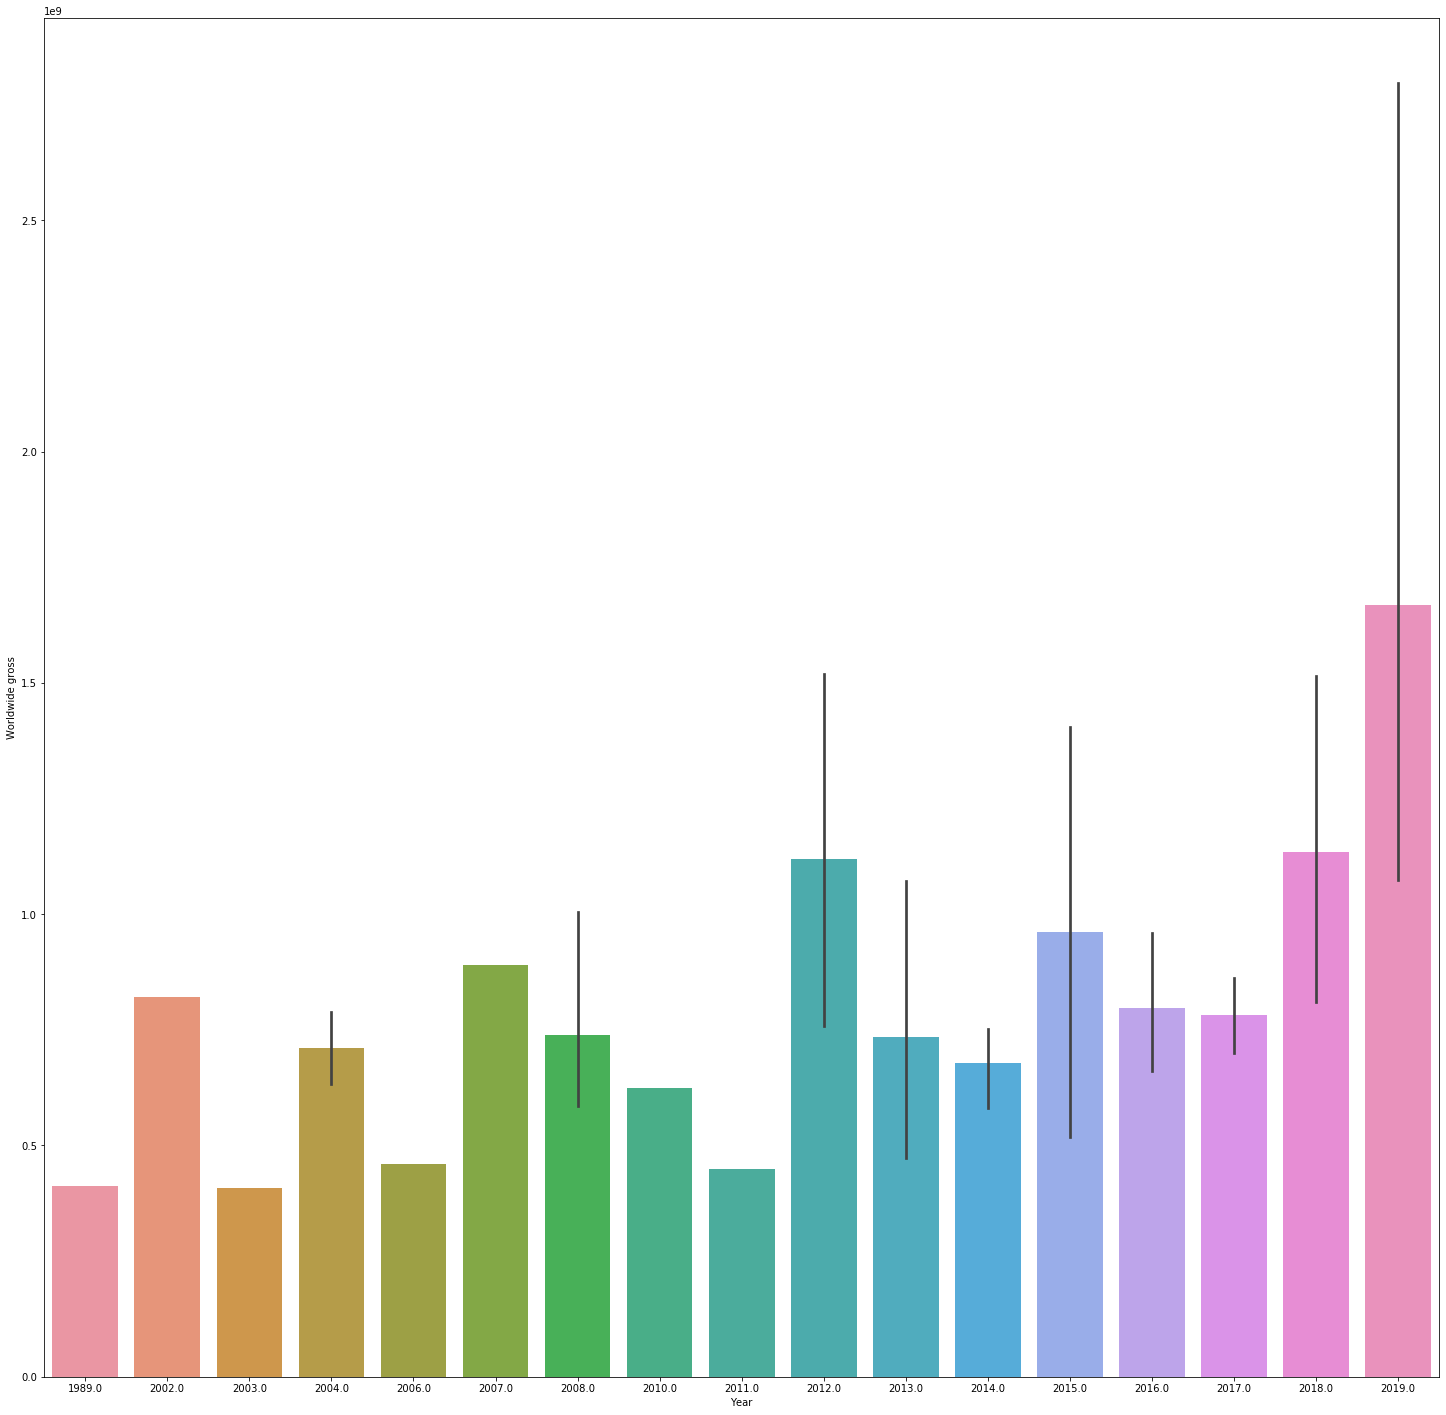

In [118]:
import seaborn as sn
df_new=df_action[['Year','Worldwide gross']].transpose()
fig, ax = plt.subplots(figsize=(25,25))
sn.barplot(x='Year',y='Worldwide gross',data=df_action,ax=ax)

So from the above bar plot we can see that 2019 was the best year for super hero movies.Now lets move on to science fiction movies

In [119]:
df_science=pd.read_excel('science.xlsx')
df_science

,Rank,Film,Worldwide gross,Year
0,1,Avengers: Endgame,2797800564,2019
1,2,Avatar,2789679794,2009
2,3,Star Wars: The Force Awakens,2068223624,2015
3,4,Avengers: Infinity War,2048359754,2018
4,5,Jurassic World,1671713208,2015
5,6,The Avengers,1518812988,2012
6,7,Avengers: Age of Ultron,1405403694,2015
7,8,Black Panther,1346913161,2018
8,9,Star Wars: The Last Jedi,1332539889,2017
9,10,Jurassic World: Fallen Kingdom,1308467944,2018


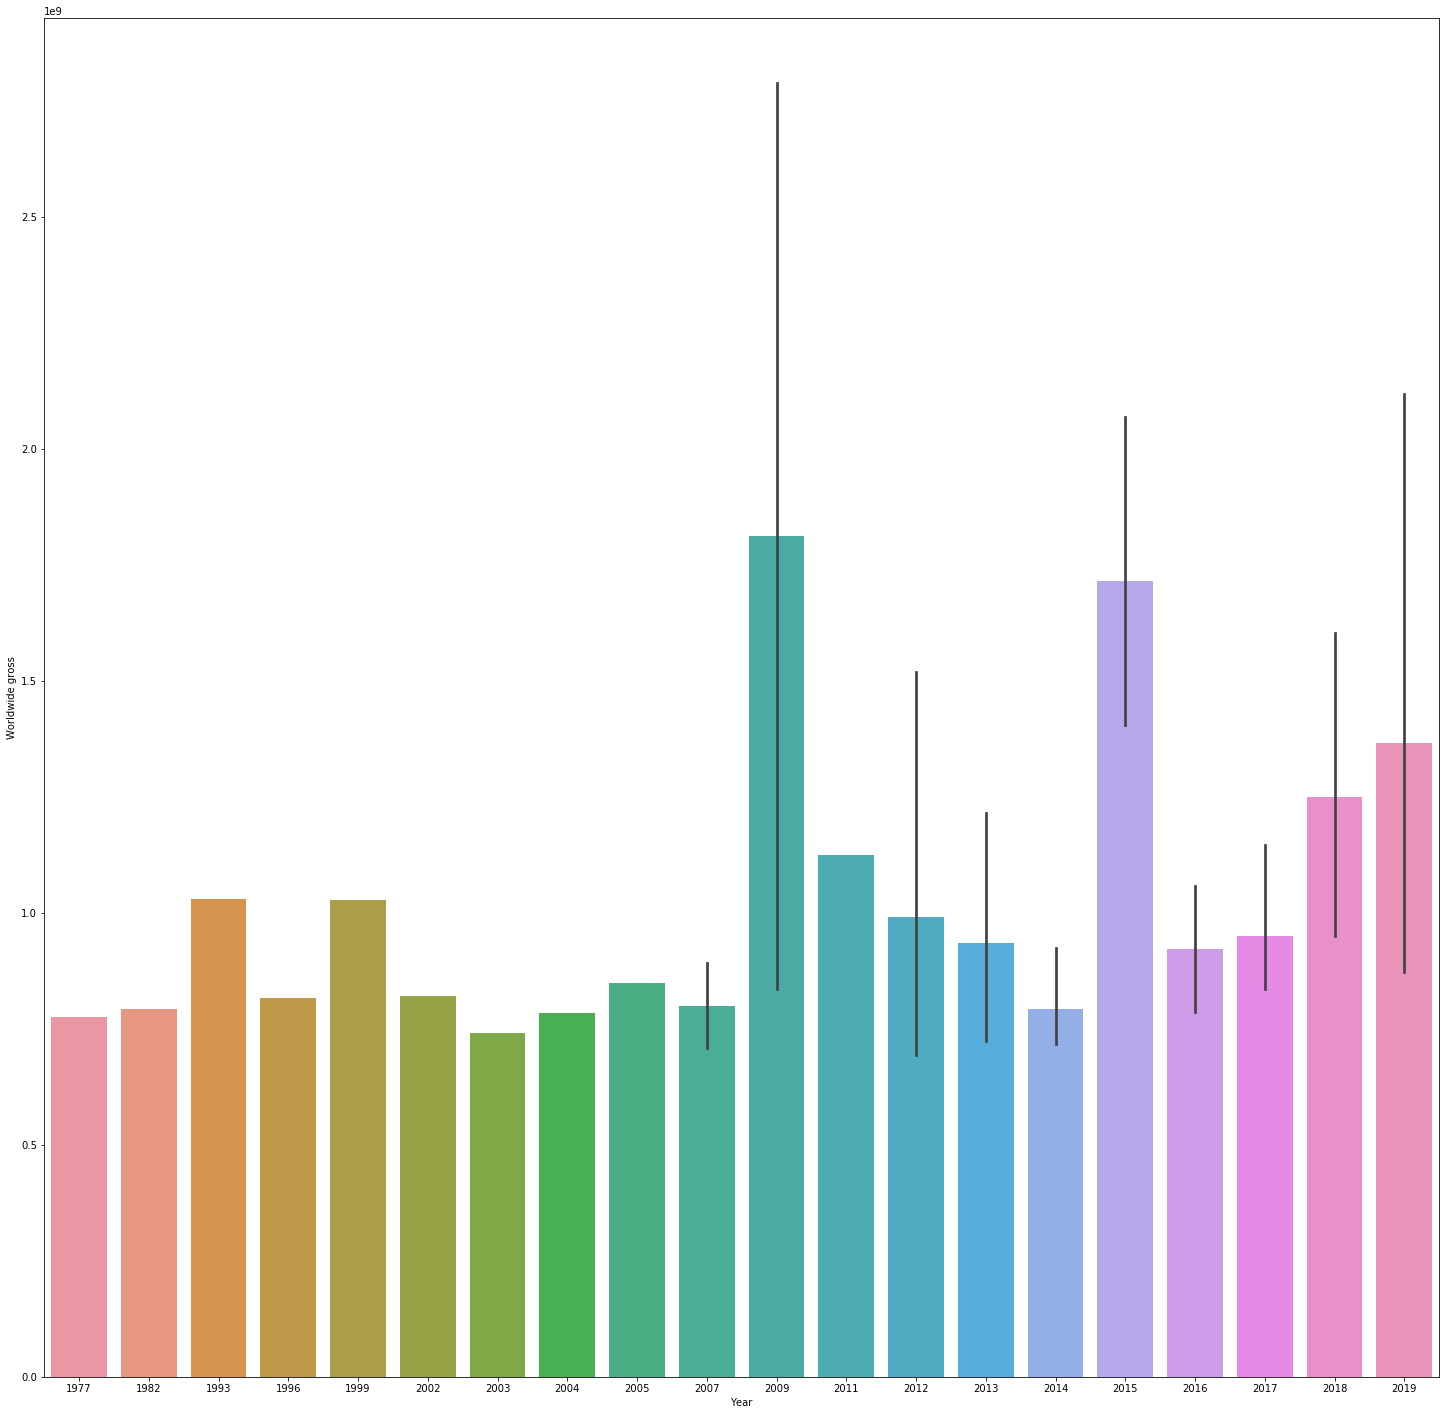

In [120]:
fig, ax = plt.subplots(figsize=(25,25))
df_science['Worldwide gross']=df_science['Worldwide gross'].astype('int')
sn.barplot(x='Year',y='Worldwide gross',data=df_science,ax=ax)

Well it seems like science fiction movies were most popular in the year 2009..Now lets move on to horror,comedy and animated movies...

In [121]:
df_horror=pd.read_excel('horror.xlsx')
df_horror

,Rank,Film,Worldwide gross,Year
0,1,It,700381748,2017
1,2,The Sixth Sense,672806292,1999
2,3,War of the Worlds,591745540,2005
3,4,I Am Legend,585349010,2007
4,5,World War Z,540007876,2013
5,6,The Meg,530243742,2018
6,7,Godzilla,529076069,2014
7,8,It Chapter Two,473093228,2019
8,9,Jaws,470653000,1975
9,10,The Exorcist,441306145,1973


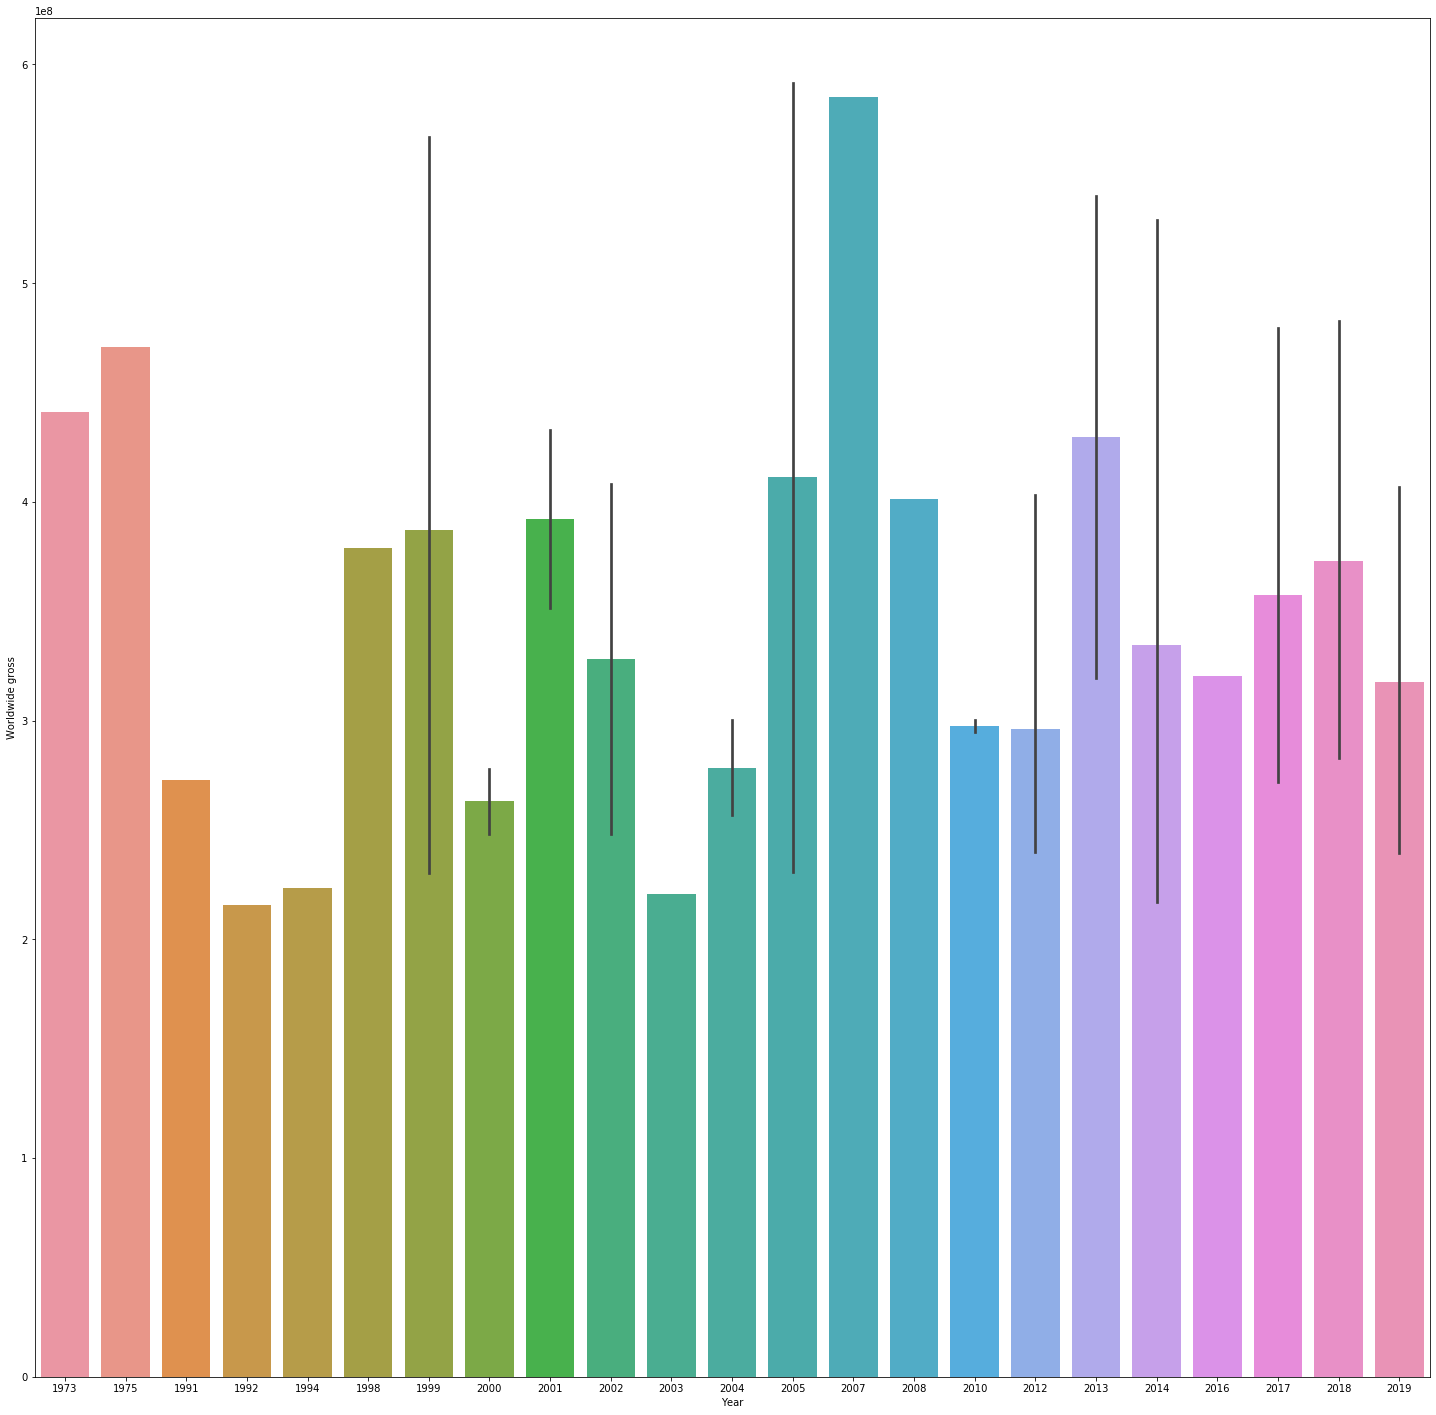

In [122]:
fig, ax = plt.subplots(figsize=(25,25))
df_horror['Worldwide gross']=df_horror['Worldwide gross'].astype('int')
sn.barplot(x='Year',y='Worldwide gross',data=df_horror,ax=ax)

well it seems like 2007 was the most popular year for horror movies.let's continue

In [123]:
df_comedy=pd.read_excel('comedy.xlsx')
df_comedy

,Rank,Film,Worldwide Gross,Year
0,1,Incredibles 2,1242805359,2018
1,2,Minions,1159398397,2015
2,3,Despicable Me 3,1035799409,2017
3,4,Despicable Me 2,970761885,2013
4,5,Shrek 2,919800000,2004
5,6,The Secret Life of Pets,875457937,2016
6,7,Shrek the Third,798958162,2007
7,8,Deadpool 2,785046920,2018
8,9,Deadpool,783112979,2016
9,10,Shrek Forever After,752600867,2010


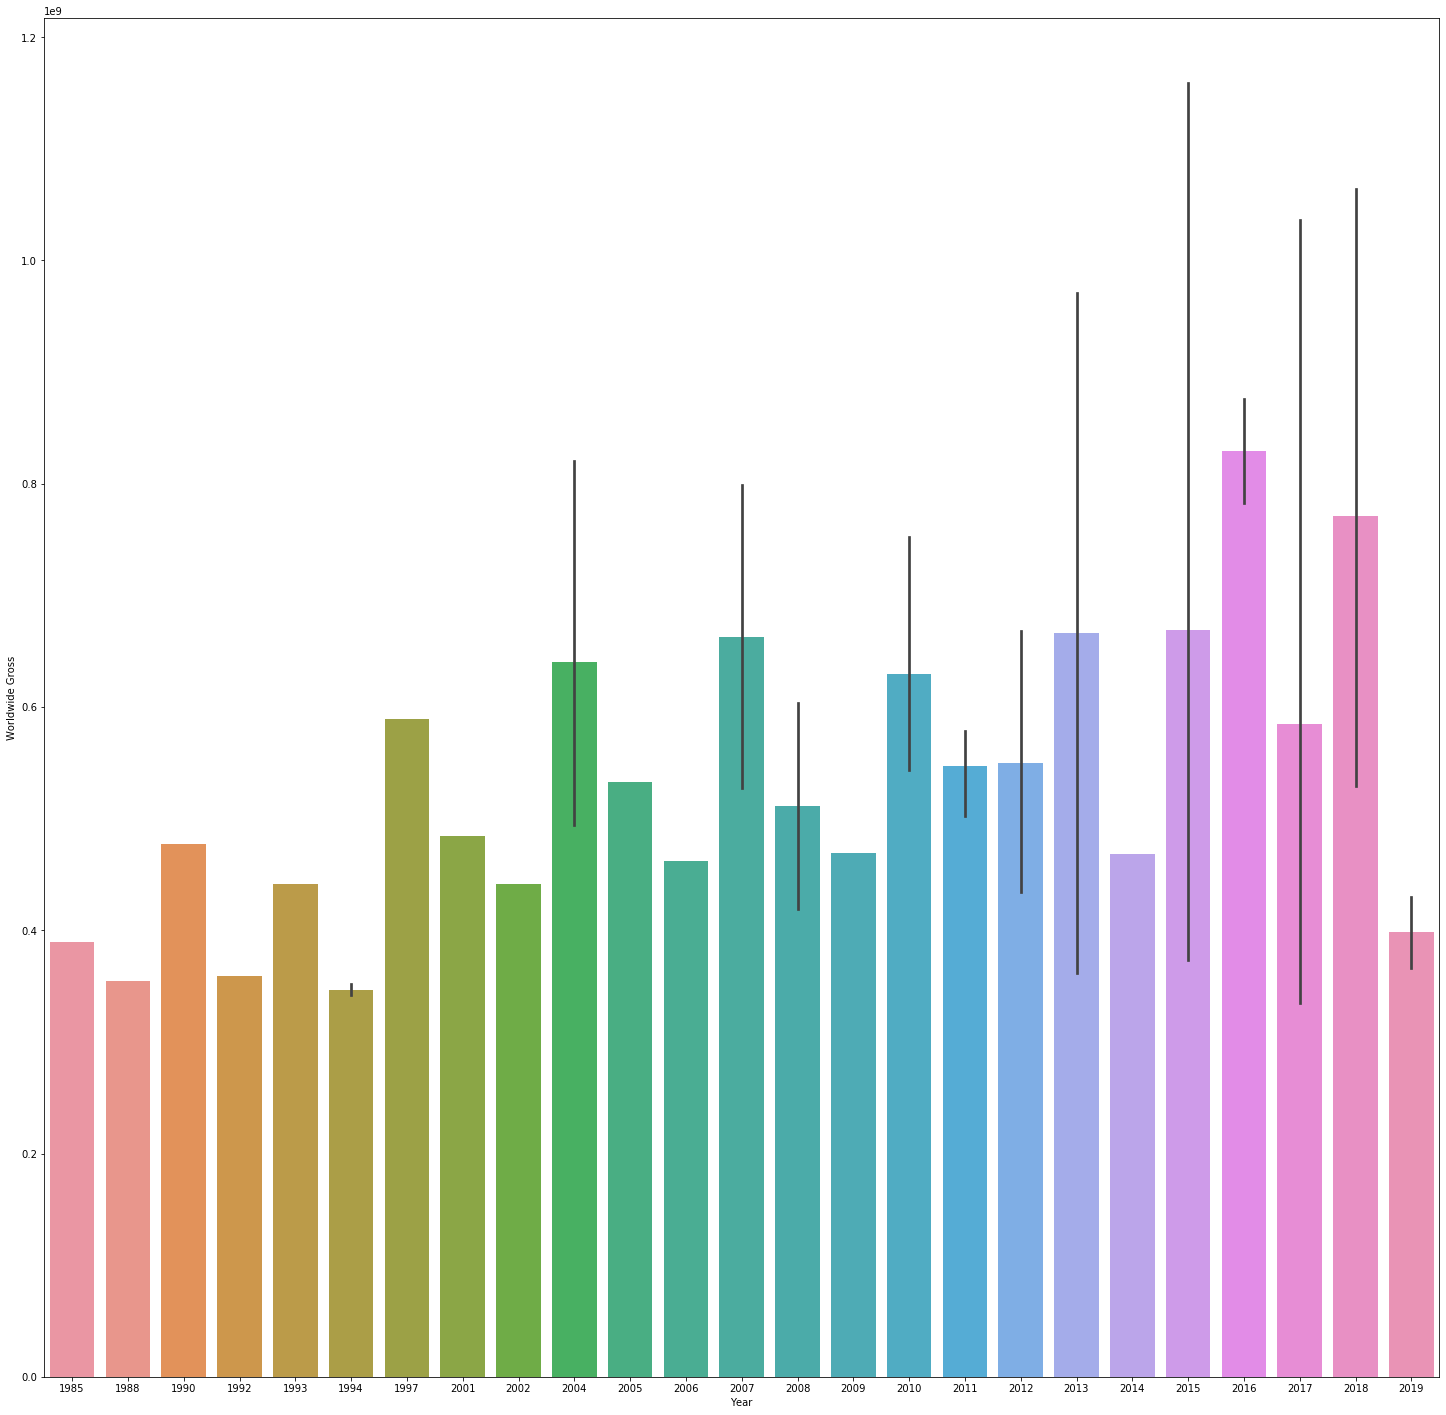

In [124]:
fig, ax = plt.subplots(figsize=(25,25))
df_comedy['Worldwide Gross']=df_comedy['Worldwide Gross'].astype('int')
sn.barplot(x='Year',y='Worldwide Gross',data=df_comedy,ax=ax)

2016 for comedy now lets move on to the last genre being evaluated in this battle:animation/live-action

In [125]:
df_anim=pd.read_excel('animation.xlsx')
df_anim

,Rank,Title,Worldwide gross,Year
0,1,The Smurfs,563749323,2011
1,2,Ted,549368315,2012
2,3,Teenage Mutant Ninja Turtles,493333584,2014
3,4,Alvin and the Chipmunks: The Squeakquel,443140005,2009
4,5,Pokémon Detective Pikachu,431605346,2019
5,6,Alvin and the Chipmunks,361336633,2007
6,7,Peter Rabbit,351266433,2018
7,8,Mary Poppins Returns,349537494,2018
8,9,The Smurfs 2,347545360,2013
9,10,Alvin and the Chipmunks: Chipwrecked,342695435,2011


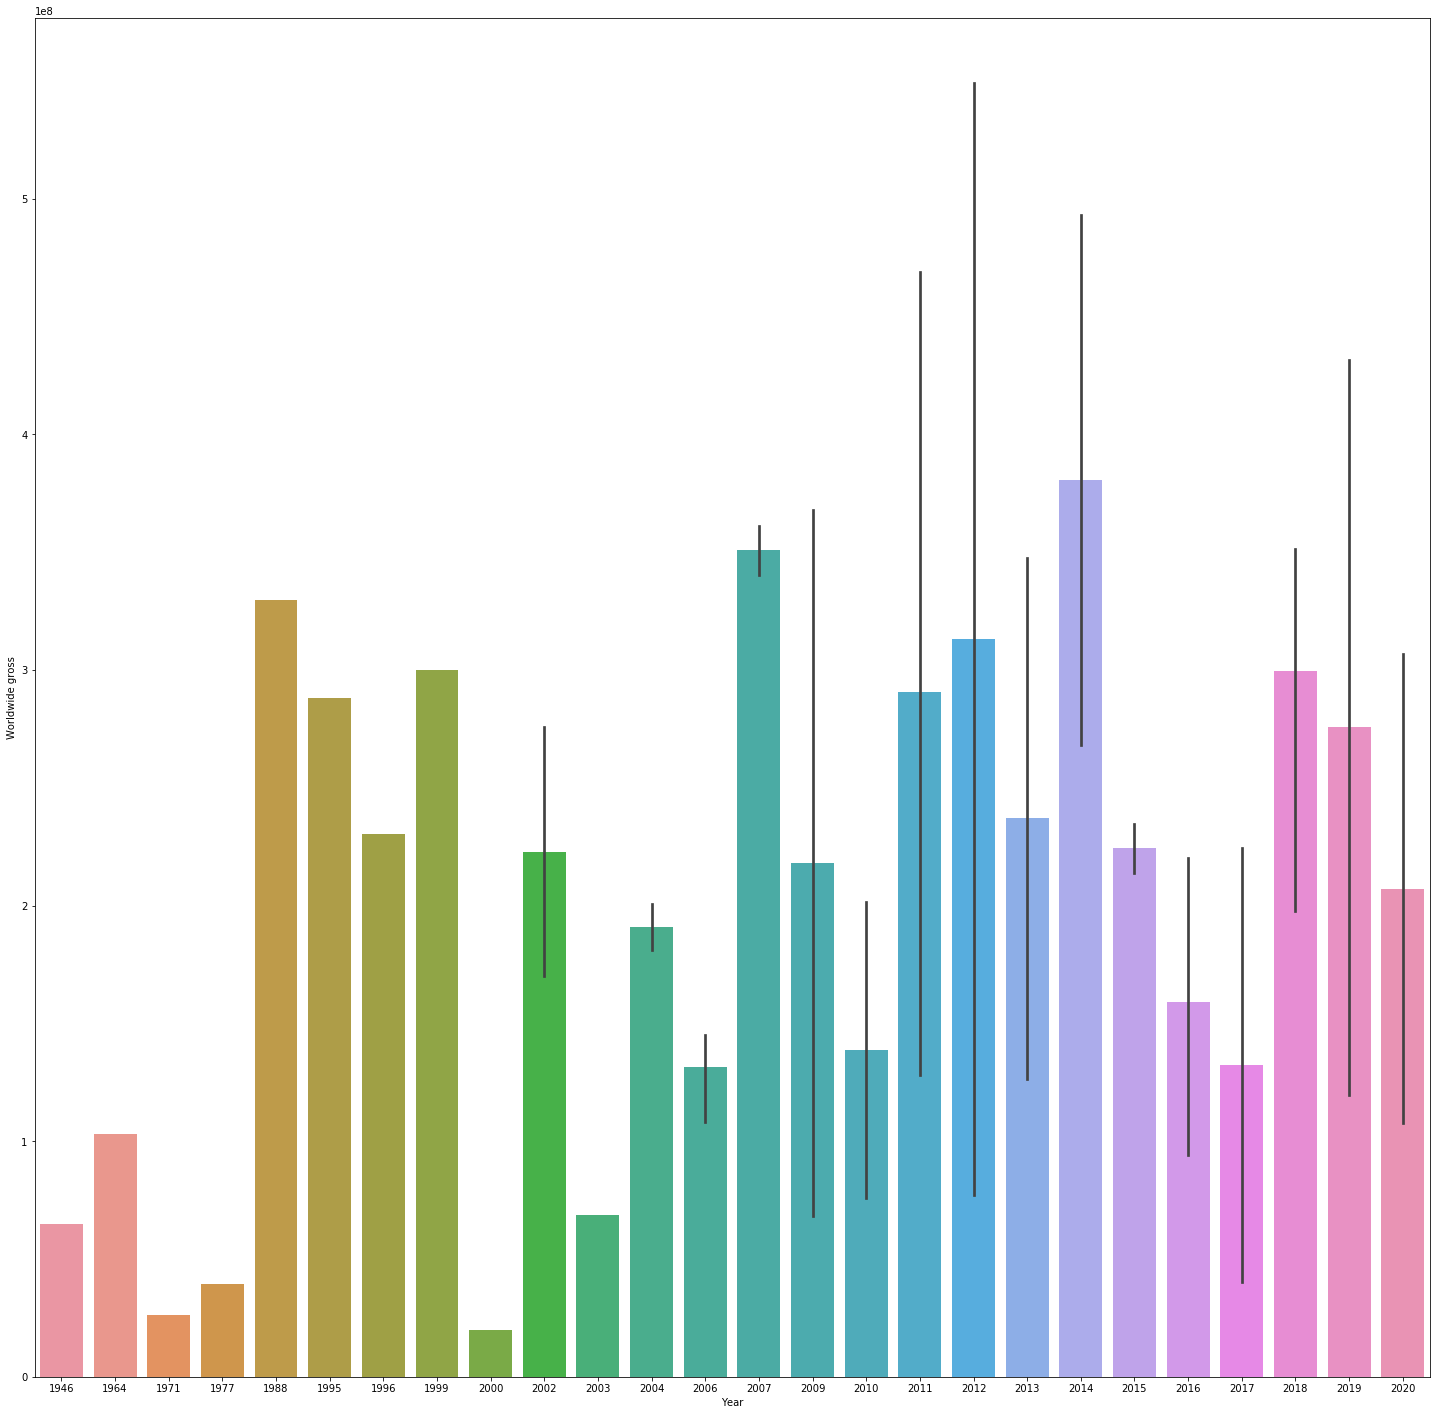

In [126]:
fig, ax = plt.subplots(figsize=(25,25))
df_anim['Worldwide gross']=df_anim['Worldwide gross'].astype('int')
sn.barplot(x='Year',y='Worldwide gross',data=df_anim,ax=ax)

Hmmm....2014 was very popular for animation...Now lets head on to find out which genre is the most popular 

In [127]:
max_action=df_action['Worldwide gross'].astype('int').max()
max_science=df_science['Worldwide gross'].astype('int').max()
max_horror=df_horror['Worldwide gross'].astype('int').max()
max_comedy=df_comedy['Worldwide Gross'].astype('int').max()
max_anim=df_anim['Worldwide gross'].astype('int').max()

In [128]:
dictionary=dict()
dictionary={'genre':['action','science','horror','comedy','anim'],'gross values':[max_action,max_science,max_horror,max_comedy,max_anim]}

In [129]:
df_tot=pd.DataFrame(dictionary)
df_tot

,genre,gross values
0,action,2797800564
1,science,2797800564
2,horror,700381748
3,comedy,1242805359
4,anim,563749323


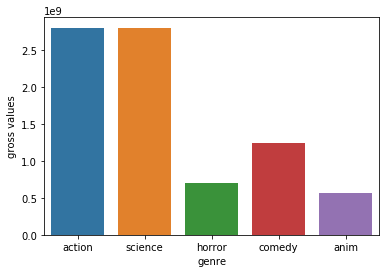

In [130]:
sn.barplot(x='genre',y='gross values',data=df_tot)

So according to our study action and science movies have the most popularity in today's world,whereas animation doesn't have much popularity

Ok now let's find out in U.S which cities there are the most number of theatres...from this information we can find out in which city movies are the most popular when they are released..lets look at the data's of some of the cities with Foursquare API...

In [131]:
CLIENT_ID='T0DZHOX10FDX5ZZNKQLIVGLHYQAVFOGIM1QRJZN3Q3U0QOJE'
CLIENT_SECRET='0PL015D4N4Z2URPN0VGMPE3NJ5JEW2AJZSXN0GOZOW0GURK0'
VERSION=20200201

In [132]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

Ok...first lets find out the most popular cities in the United states then we will find out the number of theatres in each of those cities

In [134]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 



Solving environment: done

# All requested packages already installed.



In [136]:
geolocator = Nominatim()



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [137]:
df_country=pd.read_excel('most_popular_countries.xlsx')
df_country=df_country.dropna(subset=['City'])
df_top_20=df_country.head(20)

In [138]:
lst=df_top_20['City'].to_list()
lst

['New York',
 'Los Angeles',
 'Chicago',
 'Houston',
 'Phoenix',
 'Philadelphia',
 'San Antonio',
 'San Diego',
 'Dallas',
 'San Jose',
 'Austin',
 'Jacksonville',
 'Fort Worth',
 'Columbus',
 'San Francisco',
 'Charlotte',
 'Indianapolis',
 'Seattle',
 'Denver',
 'Washington']

In [139]:
latitude=list()
longitude=list()
for itm in lst:
    locatn = geolocator.geocode(itm)
    latitude.append(locatn.latitude)
    longitude.append(locatn.longitude)

In [140]:
df_top_20['Latitude']=latitude
df_top_20['Longitude']=longitude
df_top_20

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2018 rank,City,2018 estimate,Latitude,Longitude
1,1,New York,8398748,40.712728,-74.006015
2,2,Los Angeles,3990456,34.053691,-118.242767
3,3,Chicago,2705994,41.875562,-87.624421
4,4,Houston,2325502,29.758938,-95.367697
5,5,Phoenix,1660272,33.448437,-112.074142
6,6,Philadelphia,1584138,39.952724,-75.163526
7,7,San Antonio,1532233,29.424600,-98.495141
8,8,San Diego,1425976,32.717421,-117.162771
9,9,Dallas,1345047,32.776272,-96.796856
10,10,San Jose,1030119,37.336191,-121.890583


So the above are the popular 20 cities in New York now let's find out the number of movie theatres in the above cities

In [141]:
top_20_city_theatres = getNearbyVenues(names=df_top_20['City'],
                                   latitudes=df_top_20['Latitude'],
                                   longitudes=df_top_20['Longitude']
                                  )

New York
Los Angeles
Chicago
Houston
Phoenix
Philadelphia
San Antonio
San Diego
Dallas
San Jose
Austin
Jacksonville
Fort Worth
Columbus
San Francisco
Charlotte
Indianapolis
Seattle
Denver
Washington


In [142]:
top_20_city_theatres.head()
top_20_temp=top_20_city_theatres
top_20_temp

,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,New York,40.712728,-74.006015,The Bar Room at Temple Court,40.711448,-74.006802,Hotel Bar
1,New York,40.712728,-74.006015,"The Beekman, A Thompson Hotel",40.711173,-74.006702,Hotel
2,New York,40.712728,-74.006015,Alba Dry Cleaner & Tailor,40.711434,-74.006272,Laundry Service
3,New York,40.712728,-74.006015,City Hall Park,40.712415,-74.006724,Park
4,New York,40.712728,-74.006015,The Class by Taryn Toomey,40.712753,-74.008734,Gym / Fitness Center
...,...,...,...,...,...,...,...
1988,Washington,38.894985,-77.036571,Tonic Lounge,38.898201,-77.046554,Bar
1989,Washington,38.894985,-77.036571,Starbucks,38.903027,-77.031708,Coffee Shop
1990,Washington,38.894985,-77.036571,Rawlins Park,38.895669,-77.042327,Plaza
1991,Washington,38.894985,-77.036571,The George Washington University Museum | The ...,38.898494,-77.046406,History Museum


In [143]:

top_20_aa = top_20_temp[top_20_temp['Venue_Category'].str.contains('Movie Theater')].reset_index(drop=True)

In [144]:
top_20_aa

,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Phoenix,33.448437,-112.074142,AMC Arizona Center 24,33.453572,-112.069194,Movie Theater
1,Philadelphia,39.952724,-75.163526,Philadelphia Film Center,39.950835,-75.164683,Movie Theater
2,Dallas,32.776272,-96.796856,Alamo Drafthouse Cinema,32.769801,-96.799298,Movie Theater
3,Austin,30.271129,-97.743700,Paramount Theatre,30.269457,-97.742077,Movie Theater
4,Austin,30.271129,-97.743700,Alamo Drafthouse Cinema,30.267460,-97.739550,Movie Theater
5,Austin,30.271129,-97.743700,Violet Crown Cinema,30.265524,-97.748189,Indie Movie Theater
6,Fort Worth,32.753177,-97.332746,AMC Palace 9,32.755499,-97.329827,Movie Theater
7,Columbus,39.962260,-83.000707,COSI Extreme Screen Theater,39.959747,-83.006626,Movie Theater
8,San Francisco,37.779026,-122.419906,Opera Plaza Cinema,37.781445,-122.421277,Indie Movie Theater
9,Charlotte,35.227087,-80.843127,IMAX Dome Theater at Discovery Place,35.229688,-80.841768,Movie Theater


so those are the list of movie theaters in our top 20 cities now lets draw a map to find out which city has the most number of theaters:

In [147]:


import folium
rainbow = '#00ff00'
map_theater = folium.Map(location=(37.0902405, -95.7128906),zoom_start=5)



In [150]:
for lat,lon,ven,dist in zip(top_20_aa['Venue_Lat'],top_20_aa['Venue_Long'],top_20_aa['Venue'],top_20_aa['District']):
    label=folium.Popup(str(ven)+' in '+str(dist))
    folium.features.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6).add_to(map_theater)


So from the above map we cans see that the most popular city in US among movigoers is

Well so the result of this small research is that the most lovable genre of the American population is action and science fiction and movies are most popular in the city of

In [152]:
map_theater